### ECON 570: Assignment 2

#### Name: Jaehyun Ha 

In [1]:
import pandas as pd
import numpy as np
from numpy import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from statistics import mean
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from tqdm import tqdm
import graphviz as gr

### Q1. Controling for covariates

#### ->DAG
In this case, we have a treatment variable (T) and two covariates (X1, X2) that explains our dependent variable (Y). The DAG of this setting can be illustrated as below.

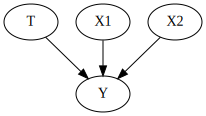

In [2]:
# DAG
g1 = gr.Digraph()

g1.edge("T", "Y")
g1.edge("X1", "Y")
g1.edge("X2", "Y")
g1

#### ->Real-life example

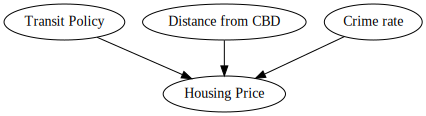

In [3]:
g2 = gr.Digraph()

g2.edge("Transit Policy", "Housing Price")
g2.edge("Distance from CBD", "Housing Price")
g2.edge("Crime rate", "Housing Price")
g2

#### ->Create data

In [4]:
n = 10000 #create data with 10000 rows
t = random.randint(2, size=n)
intercept = 10
x1 = random.rand(n)
x2 = random.rand(n)
error = random.rand(n)
y = intercept + 5 * t + 5 * x1 + 15 * x2 + error * 5
df = pd.DataFrame({'y':y, 't':t,'x1':x1,'x2':x2})
df.to_csv('data_Q1.csv')

#### -> Run simulation 

In [5]:
sim_n = 100 #how many times you would run the MC simulation

##### N=100, Without covariates

In [6]:
bias = []
rmse = []
teffect = []

N= 100

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n100_wocovariate = mean(bias)
rmse_n100_wocovariate = mean(rmse)
teffect_n100_wocovariate = mean(teffect)

##### N=1000, Without covariates

In [7]:
bias = []
rmse = []
teffect = []

N= 1000

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n1000_wocovariate = mean(bias)
rmse_n1000_wocovariate = mean(rmse)
teffect_n1000_wocovariate = mean(teffect)

##### N=100, With covariates

In [8]:
bias = []
rmse = []
teffect = []

N= 100

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t + x1 + x2', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n100_wcovariate = mean(bias)
rmse_n100_wcovariate = mean(rmse)
teffect_n100_wcovariate = mean(teffect)

##### N=1000, With covariates

In [9]:
bias = []
rmse = []
teffect = []

N= 1000

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t + x1 + x2', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n1000_wcovariate = mean(bias)
rmse_n1000_wcovariate = mean(rmse)
teffect_n1000_wcovariate = mean(teffect)

In [10]:
print("N=100, without covariates")
print("Bias:", bias_n100_wocovariate, "RMSE:", rmse_n100_wocovariate, "teffect", teffect_n100_wocovariate)
print("N=1000, without covariates")
print("Bias:", bias_n1000_wocovariate, "RMSE:", rmse_n1000_wocovariate, "teffect", teffect_n1000_wocovariate)
print("N=100, with covariates")
print("Bias:", bias_n100_wcovariate, "RMSE:", rmse_n100_wcovariate, "teffect", teffect_n100_wcovariate)
print("N=1000, with covariates")
print("Bias:", bias_n1000_wcovariate, "RMSE:", rmse_n1000_wcovariate, "teffect", teffect_n1000_wcovariate)

N=100, without covariates
Bias: 0.034300570248366156 RMSE: 4.725318085668353 teffect 4.965699429751634
N=1000, without covariates
Bias: -0.07993250312996479 RMSE: 4.82625152826738 teffect 5.079932503129965
N=100, with covariates
Bias: -0.06503626362077852 RMSE: 1.4071592074892059 teffect 5.065036263620779
N=1000, with covariates
Bias: -0.04434354316631013 RMSE: 1.4425627191949917 teffect 5.04434354316631


### Q2. Confounders

#### ->DAG
In this case, we have a treatment variable (T) that explains our dependent variable (Y). However, we have a confounder that both affects T and Y. The DAG of this setting can be illustrated as below.

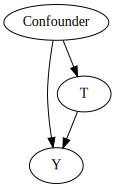

In [11]:
# DAG
g1 = gr.Digraph()

g1.edge("Confounder", "Y")
g1.edge("Confounder", "T")
g1.edge("T", "Y")
g1

#### ->Real-life example

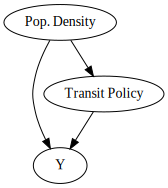

In [12]:
g2 = gr.Digraph()

g2.edge("Pop. Density", "Y")
g2.edge("Pop. Density", "Transit Policy")
g2.edge("Transit Policy", "Y")
g2

#### ->Create data

In [13]:
n = 10000 #create data with 10000 rows
intercept = 10
con = random.rand(n)
t = 0.7 * con + random.rand(n) * 7
error = random.rand(n)
y = intercept + 5 * t + 10 * con + error * 5
df = pd.DataFrame({'y':y, 't':t,'con':con})
df.to_csv('data_Q2.csv')

#### -> Run simulation 

In [14]:
sim_n = 100 #how many times you would run the MC simulation

##### N=100, Without confounder

In [15]:
bias = []
rmse = []
teffect = []

N= 100

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n100_woconfounder = mean(bias)
rmse_n100_woconfounder = mean(rmse)
teffect_n100_woconfounder = mean(teffect)

##### N=1000, Without confounder

In [16]:
bias = []
rmse = []
teffect = []

N= 1000

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n1000_woconfounder = mean(bias)
rmse_n1000_woconfounder = mean(rmse)
teffect_n1000_woconfounder = mean(teffect)

##### N=100, With confounder

In [17]:
bias = []
rmse = []
teffect = []

N= 100

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t + con', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n100_wconfounder = mean(bias)
rmse_n100_wconfounder = mean(rmse)
teffect_n100_wconfounder = mean(teffect)

##### N=1000, With confounder

In [18]:
bias = []
rmse = []
teffect = []

N= 1000

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t + con', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n1000_wconfounder = mean(bias)
rmse_n1000_wconfounder = mean(rmse)
teffect_n1000_wconfounder = mean(teffect)

In [19]:
print("N=100, without confounder")
print("Bias:", bias_n100_woconfounder, "RMSE:", rmse_n100_woconfounder, "teffect", teffect_n100_woconfounder)
print("N=1000, without confounder")
print("Bias:", bias_n1000_woconfounder, "RMSE:", rmse_n1000_woconfounder, "teffect", teffect_n1000_woconfounder)
print("N=100, with confounder")
print("Bias:", bias_n100_wconfounder, "RMSE:", rmse_n100_wconfounder, "teffect", teffect_n100_wconfounder)
print("N=1000, with confounder")
print("Bias:", bias_n1000_wconfounder, "RMSE:", rmse_n1000_wconfounder, "teffect", teffect_n1000_wconfounder)

N=100, without confounder
Bias: -0.10978649115875601 RMSE: 3.148482664521769 teffect 5.109786491158756
N=1000, without confounder
Bias: -0.11661205425836223 RMSE: 3.180251135746207 teffect 5.116612054258362
N=100, with confounder
Bias: -0.01079768306712296 RMSE: 1.4134213585836048 teffect 5.010797683067123
N=1000, with confounder
Bias: -0.003730301455703211 RMSE: 1.4435545287204128 teffect 5.003730301455703


### Q3. Controlling for the variable in between the path from cause to effect

#### ->DAG
In this case, we have a treatment variable (T) that explains our dependent variable (Y). However, we have a mediator Z affected by T and affects Y. The DAG of this setting can be illustrated as below.

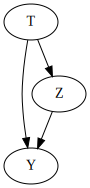

In [20]:
# DAG
g1 = gr.Digraph()

g1.edge("T", "Y")
g1.edge("T", "Z")
g1.edge("Z", "Y")
g1

#### ->Real-life example

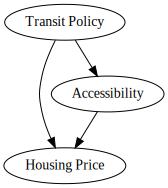

In [21]:
g2 = gr.Digraph()

g2.edge("Transit Policy", "Housing Price")
g2.edge("Transit Policy", "Accessibility")
g2.edge("Accessibility", "Housing Price")
g2

#### ->Create data

In [22]:
n = 10000 #create data with 10000 rows
intercept = 10
t = random.rand(n) * 7
z = t * 0.5 + random.rand(n)*5
error = random.rand(n)
y = intercept + 5 * t + 3 * z + error * 5
df = pd.DataFrame({'y':y, 't':t,'z':z})
df.to_csv('data_Q3.csv')

#### -> Run simulation 

In [23]:
sim_n = 100 #how many times you would run the MC simulation

##### N=100, Without mediator

In [24]:
bias = []
rmse = []
teffect = []

N= 100

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n100_womediator = mean(bias)
rmse_n100_womediator = mean(rmse)
teffect_n100_womediator = mean(teffect)

##### N=1000, Without mediator

In [25]:
bias = []
rmse = []
teffect = []

N= 1000

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n1000_womediator = mean(bias)
rmse_n1000_womediator = mean(rmse)
teffect_n1000_womediator = mean(teffect)

##### N=100, With mediator

In [26]:
bias = []
rmse = []
teffect = []

N= 100

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t + z', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n100_wmediator = mean(bias)
rmse_n100_wmediator = mean(rmse)
teffect_n100_wmediator = mean(teffect)

##### N=1000, With mediator

In [27]:
bias = []
rmse = []
teffect = []

N= 1000

for trial in range(0, sim_n):
    df_temp = df.sample(n=N)
    model = smf.ols('y ~ t + z', data=df_temp)
    result = model.fit()
    bias_temp = 5 - result.params['t']
    mse_temp = mean_squared_error(df_temp['y'].tolist(), result.predict(df_temp).tolist())
    rmse_temp = math.sqrt(mse_temp)
    teffect_temp = result.params['t']
    bias.append(bias_temp)
    rmse.append(rmse_temp)
    teffect.append(teffect_temp)
    
bias_n1000_wmediator = mean(bias)
rmse_n1000_wmediator = mean(rmse)
teffect_n1000_wmediator = mean(teffect)

In [28]:
print("N=100, without mediator")
print("Bias:", bias_n100_womediator, "RMSE:", rmse_n100_womediator, "teffect", teffect_n100_womediator)
print("N=1000, without mediator")
print("Bias:", bias_n1000_womediator, "RMSE:", rmse_n1000_womediator, "teffect", teffect_n1000_womediator)
print("N=100, with mediator")
print("Bias:", bias_n100_wmediator, "RMSE:", rmse_n100_wmediator, "teffect", teffect_n100_wmediator)
print("N=1000, with mediator")
print("Bias:", bias_n1000_wmediator, "RMSE:", rmse_n1000_wmediator, "teffect", teffect_n1000_wmediator)

N=100, without mediator
Bias: -1.4581084269992812 RMSE: 4.5211589965655055 teffect 6.4581084269992814
N=1000, without mediator
Bias: -1.5103366050346172 RMSE: 4.54692264202205 teffect 6.510336605034618
N=100, with mediator
Bias: 0.007644618971960844 RMSE: 1.429080958213693 teffect 4.992355381028039
N=1000, with mediator
Bias: 0.008773850714458362 RMSE: 1.4465215123915158 teffect 4.991226149285541


### Lessons Learned

In general, the simulation results showed that failing to control for covariates, confounders, and mediators may lead to higher RMSE values. The treatment effect was also often either under or overestimated with larger bias. With regards to sample size, it showed a pattern, in which larger samples showed smaller bias. The results were also sensitive to how the data was generated. 